## Импорт Библиотек

In [1]:
import pandas as pd
import numpy as np


pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.use('seaborn-bright')
plt.style.use('fivethirtyeight')
color_pal = sns.color_palette()

## Загрузка данных

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from zipfile import ZipFile

with ZipFile("drive/MyDrive/AnimeDataset.zip") as myzip:
    anime_with_synopsis = myzip.open("anime_with_synopsis.csv")
    anime = myzip.open("anime.csv")

anime_with_synopsis = pd.read_csv(anime_with_synopsis)
anime = pd.read_csv(anime)



In [4]:
anime.head()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770,57964,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925,146918,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378,33719,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,"TV Tokyo, Dentsu",Unknown,Toei Animation,Manga,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,766,1108,3394,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


In [5]:
anime_with_synopsis.head()

,MAL_ID,Name,Score,Genres,sypnopsis
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","In the year 2071, humanity has colonized sever..."
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space","other day, another bounty—such is the life of ..."
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","Vash the Stampede is the man with a $$60,000,0..."
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",ches are individuals with special powers like ...
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",It is the dark century and the people are suff...


In [6]:
print(f"anime shape:{anime.shape}")
print(f"anime_with_synopsis shape:{anime_with_synopsis.shape}")

anime shape:(17562, 35)
anime_with_synopsis shape:(16214, 5)


In [7]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MAL_ID         17562 non-null  int64 
 1   Name           17562 non-null  object
 2   Score          17562 non-null  object
 3   Genres         17562 non-null  object
 4   English name   17562 non-null  object
 5   Japanese name  17562 non-null  object
 6   Type           17562 non-null  object
 7   Episodes       17562 non-null  object
 8   Aired          17562 non-null  object
 9   Premiered      17562 non-null  object
 10  Producers      17562 non-null  object
 11  Licensors      17562 non-null  object
 12  Studios        17562 non-null  object
 13  Source         17562 non-null  object
 14  Duration       17562 non-null  object
 15  Rating         17562 non-null  object
 16  Ranked         17562 non-null  object
 17  Popularity     17562 non-null  int64 
 18  Members        17562 non-n

In [8]:
anime_with_synopsis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16214 entries, 0 to 16213
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   MAL_ID     16214 non-null  int64 
 1   Name       16214 non-null  object
 2   Score      16214 non-null  object
 3   Genres     16214 non-null  object
 4   sypnopsis  16206 non-null  object
dtypes: int64(1), object(4)
memory usage: 633.5+ KB


## EDA

Есть аниме без описания, для системы рекомендаций они нам не подойдут. Их всего 5%, поэтому удалим

In [9]:
missing_train = (anime_with_synopsis.isnull().sum() / anime_with_synopsis.shape[0] * 100).sort_values(ascending=False)
missing_train = missing_train[missing_train > 0]
missing_train

sypnopsis    0.04934
dtype: float64

In [10]:
anime_with_synopsis.dropna(inplace=True)

In [11]:
missing_train = (anime_with_synopsis.isnull().sum() / anime_with_synopsis.shape[0] * 100).sort_values(ascending=False)
missing_train = missing_train[missing_train > 0]
missing_train

Series([], dtype: float64)

In [12]:
anime.columns

Index(['MAL_ID', 'Name', 'Score', 'Genres', 'English name', 'Japanese name',
       'Type', 'Episodes', 'Aired', 'Premiered', 'Producers', 'Licensors',
       'Studios', 'Source', 'Duration', 'Rating', 'Ranked', 'Popularity',
       'Members', 'Favorites', 'Watching', 'Completed', 'On-Hold', 'Dropped',
       'Plan to Watch', 'Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6',
       'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1'],
      dtype='object')

Japanese name, Producers, Licensors, Ranked,	Popularity,	Members и оценки пользователей. Эти столбцы удалим в датасете anime 

In [13]:
anime = anime.drop(columns=['Japanese name', 'Producers', 'Licensors',
                            'Ranked', 'Popularity', 'Members', 'Score-10',
                            'Score-9', 'Score-8', 'Score-7', 'Score-6',
                            'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1'])

In [14]:
print(f"anime shape:{anime.shape}")

anime shape:(17562, 19)


In [15]:
anime.sample(5)

,MAL_ID,Name,Score,Genres,English name,Type,Episodes,Aired,Premiered,Studios,Source,Duration,Rating,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch
7241,15227,Kono Sekai no Katasumi ni,8.24,"Historical, Drama, Seinen",In This Corner of the World,Movie,1,"Nov 12, 2016",Unknown,MAPPA,Manga,2 hr. 36 min.,PG-13 - Teens 13 or older,963,3489,60695,1232,544,56182
4037,5234,Zettai Yareru Greece Shinwa,Unknown,"Comedy, Ecchi",Unknown,TV,13,"Oct 4, 2008 to Dec 27, 2008",Fall 2008,A-1 Pictures,Original,24 min. per ep.,R+ - Mild Nudity,1,25,107,20,103,287
6886,13053,Aimai Elegy,6.54,Music,Unknown,Music,1,"Dec 15, 2010",Unknown,Unknown,Unknown,3 min.,PG-13 - Teens 13 or older,3,16,2373,21,36,258
9376,25689,Hyakka Ryouran: Samurai After,6.69,"Ecchi, Harem",Unknown,OVA,2,"Jan 23, 2015 to Jul 1, 2015",Unknown,Arms,Light novel,24 min. per ep.,R+ - Mild Nudity,14,1018,9753,420,248,6924
2188,2390,Hoshi no Kirby,6.77,"Action, Adventure, Comedy, Parody, Fantasy",Kirby:Right Back at Ya!,TV,100,"Oct 6, 2001 to Sep 27, 2003",Fall 2001,"Studio Comet, Studio Sign",Game,24 min. per ep.,PG - Children,228,1138,12822,1919,3134,3804


Посмотрим на типы аниме в этой таблице

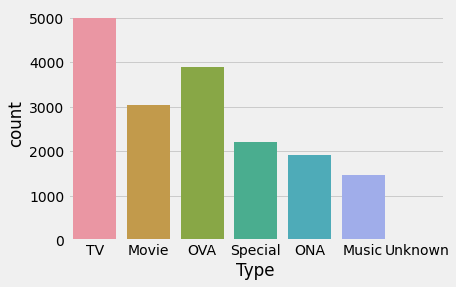

In [16]:
sns.countplot(x='Type', data=anime)
plt.show()



*   ***ONA*** - аниме-сериалы, выходящие в интернете
*   ***OVA*** - аниме-сериалы, выходящие в видеоносителях

*   ***Special*** - дополнительная серия (или отдельный ролик, фильм), приуроченная к какому-либо событию, или прилагаемая к коллекционным DVD-изданиям сериала







***TV***, ***OVA***, ***ONA*** оставим в одном датасете, ***Movie*** рассмотрим отдельно. ***Special*** специфичная вещь, поэтому их брать не будем для анализа.

In [17]:
anime_serial = anime[(anime['Type']=='ONA') | (anime['Type']=='OVA') | (anime['Type']=='TV')]

In [18]:
anime_serial.Type.value_counts()

TV     4996
OVA    3894
ONA    1907
Name: Type, dtype: int64

In [19]:
anime_movie = anime[anime['Type']=='Movie']


### Сериалы

#### Анализ длительности сериалов

In [20]:
anime_serial.sample(5)

,MAL_ID,Name,Score,Genres,English name,Type,Episodes,Aired,Premiered,Studios,Source,Duration,Rating,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch
13014,35369,Seikaisuru Kado: Ninovo,6.72,Sci-Fi,KADO:The Right Answer - Ninovo,ONA,1,"Apr 6, 2017",Unknown,Toei Animation,Original,23 min.,PG-13 - Teens 13 or older,2,326,13136,104,104,2461
1400,1542,Brain Powerd,6.11,"Action, Adventure, Mecha, Sci-Fi",Unknown,TV,26,"Apr 8, 1998 to Nov 11, 1998",Spring 1998,Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older,20,395,2655,378,593,3977
7201,14991,Harem Time The Animation,7.16,"Harem, Hentai",Unknown,OVA,2,"Oct 26, 2012 to Jan 25, 2013",Unknown,Office Takeout,Manga,26 min. per ep.,Rx - Hentai,122,1361,10831,707,524,4001
12081,33803,Sengoku Choujuu Giga: Kou,5.89,"Historical, Demons, Supernatural, Samurai",SENGOKUCHOJYUGIGA,TV,13,"Oct 9, 2016 to Jan 8, 2017",Fall 2016,ILCA,Original,3 min. per ep.,PG-13 - Teens 13 or older,5,484,2348,259,905,1578
12590,34738,Sengoku Choujuu Giga: Otsu,5.91,"Historical, Demons, Supernatural, Samurai",SENGOKUCHOJYUGIGA,TV,13,"Jan 15, 2017 to Apr 9, 2017",Winter 2017,ILCA,Original,3 min. per ep.,PG-13 - Teens 13 or older,0,154,1590,52,172,596


Достанем длительность серий из таблицы ***Duration***

In [21]:
anime_serial['Duration'] = anime_serial['Duration'].apply(lambda x: list(x.split())[0])

<ipython-input-21-7de7bd14616f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anime_serial['Duration'] = anime_serial['Duration'].apply(lambda x: list(x.split())[0])


In [22]:
anime_serial['Duration'].value_counts()[:10]

24         1798
23         1125
30         1002
25          937
1           493
5           395
3           387
Unknown     337
2           329
15          282
Name: Duration, dtype: int64

В 337 сериалах не указана длительность. Cоставим функцию для фильтрации данных, где есть "Unknown" ячейки 

In [29]:
def filter(df, column, value):
    return df[df[column]!=value]

In [30]:
dur = anime_serial[['Duration']]

dur = filter(df=dur, column='Duration', value='Unknown').astype('int')

Построим гистограмму распределения длительности аниме-сериалов

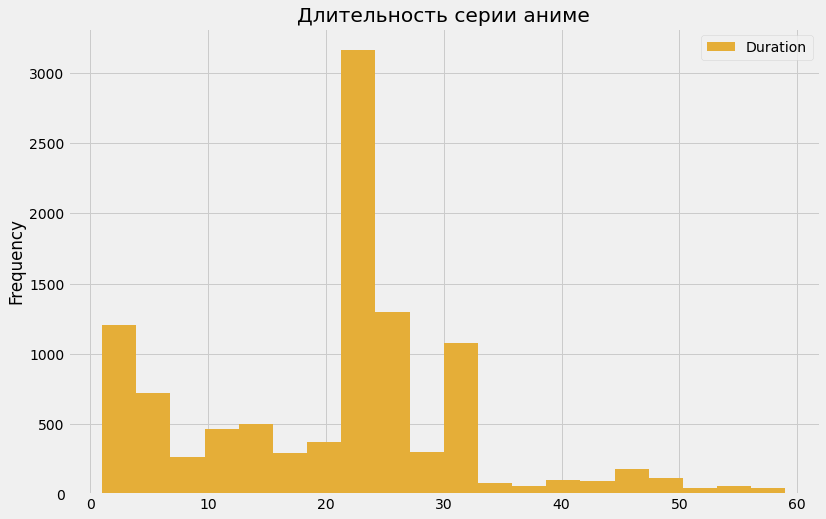

In [31]:
dur.plot(kind='hist', figsize=(12, 8), color=color_pal[2], title = 'Длительность серии аниме', bins=20)
plt.show()

Больше всего серии длятся 23-25 минут. Также есть короткометражные серии. Относительно мало тайтлов, длящихся почти час

#### В какой месяц/год выпускают наибольшее кол-во аниме

In [26]:
anime_serial.Premiered.value_counts()[:10]

Unknown        6052
Spring 2017      86
Fall 2016        79
Spring 2018      77
Spring 2016      74
Spring 2006      71
Spring 2014      71
Fall 2017        70
Spring 2011      68
Fall 2015        65
Name: Premiered, dtype: int64

Очень много пропусков в столбце даты премьер, но в ***Aired*** пропусков гораздо меньше. Этот столбец отмечает дату вещания каждого сериала, поэтому достанем оттуда год и месяц, когда сериал начал транслироваться.

In [27]:
anime_serial.Aired.value_counts()[:20]

Unknown           212
2021 to ?          43
2000               30
Apr, 2021 to ?     30
2005               28
2004               23
2003               22
Jul, 2021 to ?     19
2006               19
1998               19
1999               18
2002               16
2001               16
2008               15
2010               14
1993               14
1991               12
1997               12
Dec 21, 2001       12
1990               11
Name: Aired, dtype: int64

In [32]:
anime_date = anime_serial[['Aired']]
anime_date = filter(df=anime_date, column='Aired', value='Unknown')
# anime_date = anime_date[anime_date['Aired']!='Unknown']
anime_date.sample(20)

,Aired
4518,"Feb 21, 1997 to 2002"
15889,"Oct 7, 2019 to Dec 23, 2019"
16137,"Apr 3, 2020 to Jun 19, 2020"
15427,"Oct 10, 2019 to Dec 26, 2019"
12734,"Jul 22, 2017 to Jan 20, 2018"
7193,"Jul 3, 2012"
8216,"Jan 13, 2014 to Mar 31, 2014"
215,"Oct 6, 2004 to Mar 30, 2005"
16625,"Oct 2, 2020 to Dec 18, 2020"
15587,"Jan 25, 2019 to Jun 19, 2020"


Данные начинаются либо с месяца либо с года выпуска. Поэтому достанем первый элемент с каждой строчки, если первый элемент это месяц, то достанем и год

In [33]:
months_ser = []
years_ser = []
m = 0

for aired in list(anime_date['Aired']):
    aired = aired.replace(',', '')
    aired = aired.split()
    if len(aired) > 2:
        if aired[2] == 'to':
            months_ser.append(aired[0])
            years_ser.append(aired[1])
        elif aired[0].isdigit():
            years_ser.append(aired[0])
        else:
            months_ser.append(aired[0])
            years_ser.append(aired[2])
    elif len(aired) == 1:
        years_ser.append(aired[0])
    elif len(aired) == 2:
        years_ser.append(aired[1])
        months_ser.append(aired[0])

    

Реализуем счетчик месяцев и годов через словарь, а потом отсортируем их по убыванию. В случае годов, выведем первые 15 значений.

In [34]:
month_ser_dict = {}
years_ser_dict = {}

for month in months_ser:
    if month in list(month_ser_dict.keys()):
        month_ser_dict[month] += 1
    else:
        month_ser_dict[month] = 1

for year in years_ser:
    if year in list(years_ser_dict.keys()):
        years_ser_dict[year] += 1
    else:
        years_ser_dict[year] = 1

month_ser_dict = sorted(month_ser_dict.items(), key=lambda x:x[1], reverse=True)
years_ser_dict = sorted(years_ser_dict.items(), key=lambda x:x[1], reverse=True)[:15]

In [35]:
months = [months for months, cnt in month_ser_dict]
cnt_months = [cnt for months, cnt in month_ser_dict]

years = [years for years, cnt in years_ser_dict]
cnt_years = [cnt for years, cnt in years_ser_dict]

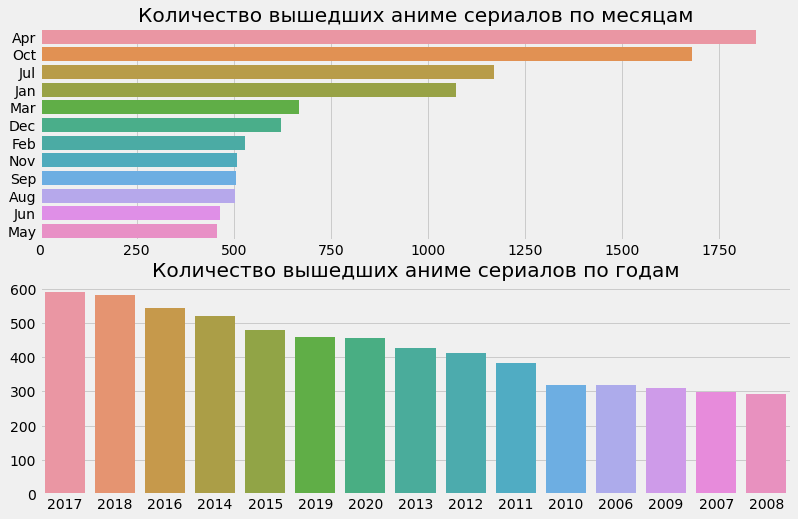

In [36]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))


sns.barplot(x=cnt_months, y=months, orient='h', ax=ax[0]).set_title('Количество вышедших аниме сериалов по месяцам')
sns.barplot(x=years, y=cnt_years, orient='v', ax=ax[1]).set_title('Количество вышедших аниме сериалов по годам')

plt.show()

Апрель и октябрь самые популярные месяцы для выпуска аниме сериалов. В эти месяцы начинаются весенние и осенние сезоны тв-сериалов

#### Оценки аниме-сериалов по годам 

In [43]:
anime_score = anime_serial[['Score', 'Aired']]
anime_score = filter(df=anime_score, column='Aired', value='Unknown')
anime_score['year'] = years_ser

anime_score = filter(df=anime_score, column='Score', value='Unknown')
anime_score.drop(columns=['Aired'], inplace=True)
anime_score.Score=anime_score.Score.astype('float')

In [41]:
anime_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7917 entries, 0 to 17504
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Score   7917 non-null   float64
 1   year    7917 non-null   object 
dtypes: float64(1), object(1)
memory usage: 185.6+ KB


In [42]:
anime_score.groupby(['year'])['Score'].mean().sort_values(ascending=False)[:15]


year
1978    7.070000
2008    6.884958
2009    6.872922
2021    6.768615
2007    6.768008
1981    6.740769
1980    6.730000
2020    6.728657
1982    6.723043
2011    6.722642
1979    6.717895
2019    6.717265
1970    6.700000
2014    6.698824
2018    6.680577
Name: Score, dtype: float64

В детстве трава была зеленее и аниме лучше). Наличие в этом списке 2019, 2020, 2021 года не может говорить о качестве аниме. Скорее всего их наличие связано с тем, что недавно вышедшее аниме имеет мало сезонов и следовательно оценка выше обычного. С течением времени произойдет регрессия к среднему и рейтинг современных аниме упадет  

#### Анализ рейтинга сериалов

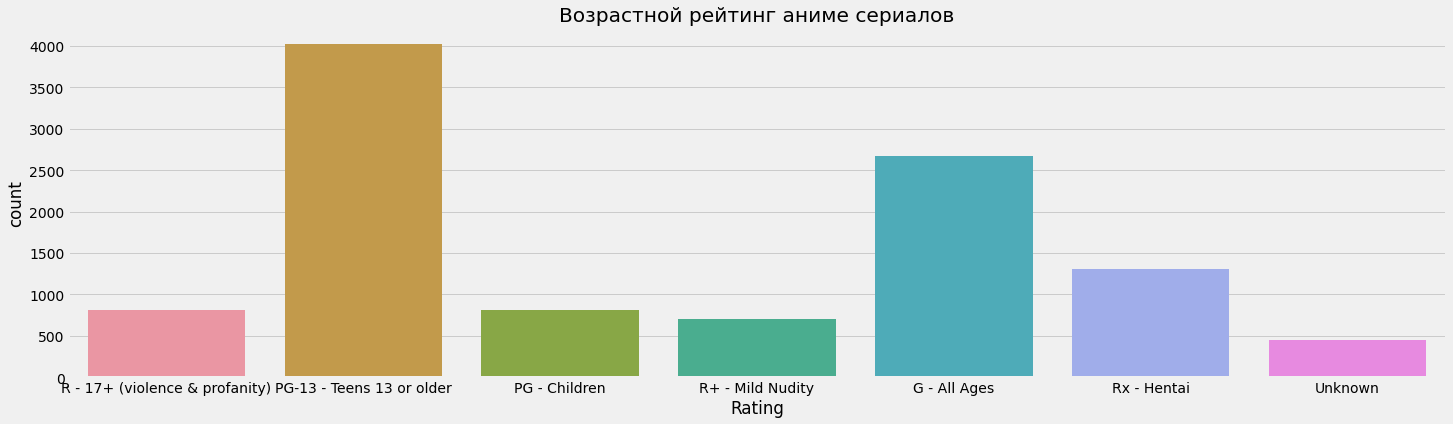

In [44]:
fig, ax =plt.subplots(figsize=(22,6))
sns.countplot(x='Rating', data=anime_serial, ax=ax).set_title('Возрастной рейтинг аниме сериалов')
plt.show()



*   Рейтинг G — ***General audiences***

Картина демонстрируется без ограничений.Данный рейтинг показывает, что оценённый фильм не содержит ничего, что большинство родителей могло бы посчитать неприемлемым для просмотра или прослушивания даже самыми маленькими детьми. Обнажение, сексуальные сцены и сцены приёма наркотиков отсутствуют; насилие минимально; могут употребляться выражения, выходящие за пределы вежливой беседы, но только те, которые постоянно встречаются в повседневной речи. Более грубая лексика в фильмах с рейтингом G употребляться не может.

*   Рейтинг PG-13 — ***Parents strongly cautioned***

Данный рейтинг показывает, что оценённый фильм может быть неподходящим для детей. Родители должны быть особенно осторожны, разрешая своим маленьким детям просмотр. Может присутствовать умеренное или грубое насилие; могут присутствовать сцены с наготой; возможны ситуации с сексуальным контекстом



*   Рейтинг R — Restricted

Лица, не достигшие 17-летнего возраста допускаются на фильм только в сопровождении одного из родителей, либо законного представителя. Данный рейтинг показывает, что оценочная комиссия заключила, что некоторый материал оценённого фильма предназначается только для взрослых. Родители должны больше узнать о фильме, прежде чем взять на его просмотр подростков. Рейтинг R может быть назначен из-за частого употребления непристойной лексики, продолжительных сцен насилия, секса или употребления наркотиков.

В свою очередь рейтинг R делится на несколько типов (R+, Rx к примеру) 





Аниме рейтинга G, PG-13 часто выпускаемые в Японии

#### Анализ жанров

In [45]:
anime_serial.head()

,MAL_ID,Name,Score,Genres,English name,Type,Episodes,Aired,Premiered,Studios,Source,Duration,Rating,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Sunrise,Original,24,R - 17+ (violence & profanity),61971,105808,718161,71513,26678,329800
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Madhouse,Manga,24,PG-13 - Teens 13 or older,12944,29113,343492,25465,13925,146918
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,Sunrise,Original,25,PG-13 - Teens 13 or older,587,4300,46165,5121,5378,33719
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,Toei Animation,Manga,23,PG - Children,18,642,7314,766,1108,3394
5,15,Eyeshield 21,7.95,"Action, Sports, Comedy, Shounen",Unknown,TV,145,"Apr 6, 2005 to Mar 19, 2008",Spring 2005,Gallop,Manga,23,PG-13 - Teens 13 or older,2066,13907,78349,14228,11573,30202


In [46]:
(anime_serial['Genres'] == 'Unknown').sum()

16

Достанем жанры тайтлов и отсортируем от наиболее популярного до наименее популярного.

In [65]:
anime_genres = anime_serial[['Genres']]
anime_genres = filter(df=anime_genres, column='Genres', value='Unknown')

genre_dict = {}

for value in list(anime_genres['Genres']):
    value = value.replace(' ', '')
    value = value.split(',')
    for genre in value:
        if genre in genre_dict.keys():
            genre_dict[genre] += 1
        else:
            genre_dict[genre] = 1
genre_sort = sorted(genre_dict.items(), key=lambda x: x[1], reverse=True)[:10]

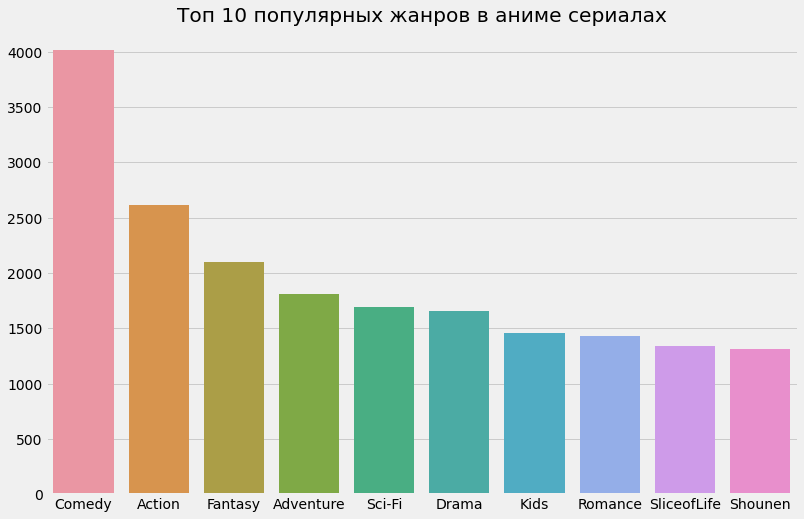

In [66]:
genre = [genre for genre, cnt in genre_sort]
cnt = [cnt for genre, cnt in genre_sort]

_, ax = plt.subplots(figsize=(12,8))
sns.barplot(x=genre, y=cnt, ax=ax).set_title('Топ 10 популярных жанров в аниме сериалах')
plt.show()

Комедии, фантазии, приключения - популярные жанры, которые подходят для большинства зрителей. Замыкает топ аниме жанра сенен. Этот жанр рассчитан на особую целевую аудиторию — мальчиков и юношей в возрасте от 12 до 18 лет.

#### Топ аниме-сериалов

In [49]:
Top_anime = anime_serial[['Score', 'Name']]
Top_anime = filter(df=Top_anime, column='Score', value='Unknown')
Top_anime.Score = Top_anime.Score.astype('float')

In [50]:
Top_anime = Top_anime.sort_values(by=['Score'], ascending=False)[:10]

Выведем топ 10 самых рейтинговых аниме сериалов

In [51]:
Top_anime

,Score,Name
3971,9.19,Fullmetal Alchemist: Brotherhood
15926,9.17,Shingeki no Kyojin: The Final Season
5683,9.11,Steins;Gate
14963,9.10,Shingeki no Kyojin Season 3 Part 2
6474,9.10,Hunter x Hunter (2011)
9913,9.10,Gintama°
6006,9.08,Gintama'
741,9.07,Ginga Eiyuu Densetsu
7261,9.04,Gintama': Enchousen
12898,9.00,3-gatsu no Lion 2nd Season


Отметим это графически через библиотеку для визуализации данных - ***Plotly***

In [52]:
import plotly.express as px

fig = px.histogram(Top_anime, x="Name", y='Score', title='Топ 10 аниме сериалов')
fig.update_yaxes(range=[8.5, 9.5])
fig.show()

### Фильмы

#### Анализ длительности фильмов

In [53]:
anime_movie.head()

,MAL_ID,Name,Score,Genres,English name,Type,Episodes,Aired,Premiered,Studios,Source,Duration,Rating,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,Movie,1,"Sep 1, 2001",Unknown,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),1174,4143,208333,1935,770,57964
21,31,Neon Genesis Evangelion: Death & Rebirth,7.45,"Drama, Mecha, Psychological, Sci-Fi",Neon Genesis Evangelion:Death & Rebirth,Movie,1,"Mar 15, 1997",Unknown,"Gainax, Production I.G",Original,1 hr. 44 min.,R - 17+ (violence & profanity),588,1941,146202,1069,961,30508
22,32,Neon Genesis Evangelion: The End of Evangelion,8.51,"Sci-Fi, Dementia, Psychological, Drama, Mecha",Neon Genesis Evangelion:The End of Evangelion,Movie,1,"Jul 19, 1997",Unknown,"Gainax, Production I.G",Original,1 hr. 27 min.,R+ - Mild Nudity,17811,8055,482918,2462,1499,77146
24,43,Koukaku Kidoutai,8.29,"Action, Mecha, Police, Psychological, Sci-Fi, ...",Ghost in the Shell,Movie,1,"Nov 18, 1995",Unknown,Production I.G,Manga,1 hr. 22 min.,R+ - Mild Nudity,10362,8152,325682,3404,1927,129114
27,46,Rurouni Kenshin: Meiji Kenkaku Romantan - Ishi...,7.56,"Samurai, Historical, Drama, Shounen",Samurai X:The Motion Picture,Movie,1,"Dec 20, 1997",Unknown,Gallop,Manga,1 hr. 31 min.,R - 17+ (violence & profanity),107,547,34481,438,228,8640


In [54]:
(anime_movie['Duration'] == 'Unknown').sum()

155

In [55]:
duration_of_movie = anime_movie[['Duration']]
duration_of_movie = filter(df=duration_of_movie, column='Duration', value='Unknown')
duration_of_movie.sample(10)

,Duration
5245,1 hr. 40 min.
2012,46 min.
14023,1 hr. 38 min.
5655,1 hr.
391,1 hr. 14 min.
14099,1 hr. 38 min.
3503,1 hr. 52 min.
15267,1 hr. 55 min.
580,1 hr. 34 min.
5278,3 min. per ep.


Достанем из столбца ***Duration*** продолжительность фильмов, реализуем пару костылей, чтобы в распределении не было выбросов

In [56]:
new_duration_min = []
for value in list(duration_of_movie['Duration']):
    value = value.replace('.', '')
    value = value.split()
    if len(value) >= 4 and value[1]=='hr':
        new_duration_min.append(int(value[0]) * 60 + int(value[2]) )
    
    elif value[1] == 'hr':
        new_duration_min.append(int(value[0]) * 60)
    
    elif value[1] == 'min':
        new_duration_min.append(int(value[0]))
    
    else:
        new_duration_min.append(1)
        

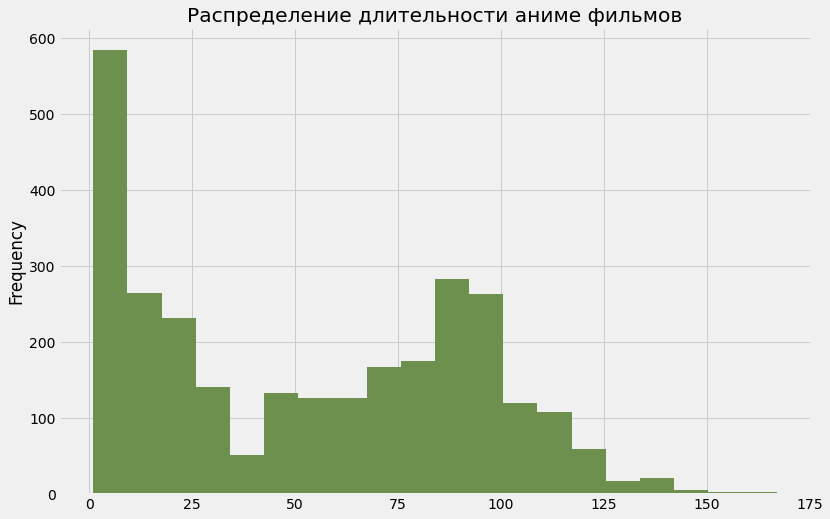

In [57]:
duration_of_movie['Duration'] = new_duration_min
duration_of_movie['Duration'].plot(kind = 'hist', figsize = (12,8),
                                   title = 'Распределение длительности аниме фильмов',
                                   color = color_pal[3],
                                   bins = 20
                                   )
plt.show()

Большое кол-во тайтлов, которые дляться меньше 10 минут, есть гора в районе 85-100 минут. Также есть провал в количестве аниме продолжительностью 30-40 минут. 

#### Анализ жанров

In [58]:
(anime_movie['Genres'] == 'Unknown').sum()

46

Выведем топ 10 популярных жанров в аниме фильмах

In [61]:
anime_genres = anime_movie[['Genres']]
anime_genres = filter(df=anime_genres, column='Genres', value='Unknown')

genre_dict = {}

for value in list(anime_genres['Genres']):
    value = value.replace(' ', '')
    value = value.split(',')
    for genre in value:
        if genre in genre_dict.keys():
            genre_dict[genre] += 1
        else:
            genre_dict[genre] = 1
genre_sort = sorted(genre_dict.items(), key=lambda x: x[1], reverse=True)[:10]

In [62]:
genre_sort

[('Comedy', 846),
 ('Adventure', 774),
 ('Action', 760),
 ('Fantasy', 731),
 ('Drama', 640),
 ('Kids', 528),
 ('Sci-Fi', 524),
 ('Shounen', 393),
 ('Dementia', 301),
 ('Historical', 285)]

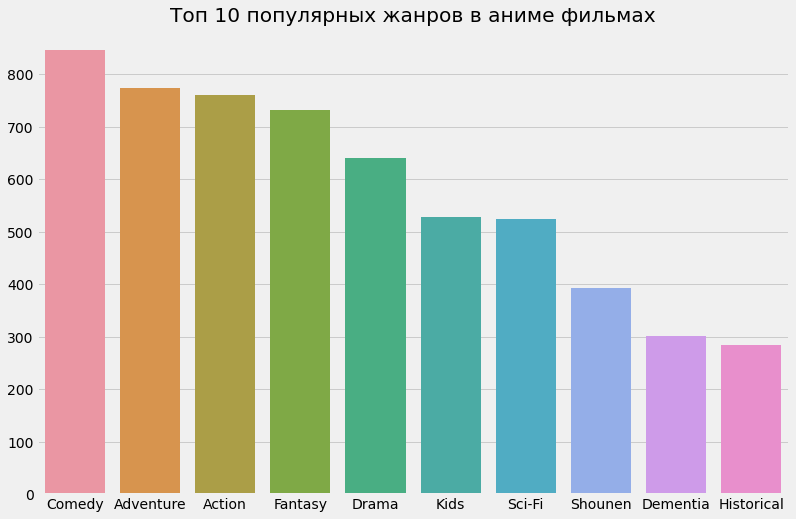

In [64]:
genre = [genre for genre, cnt in genre_sort]
cnt = [cnt for genre, cnt in genre_sort]

_, ax = plt.subplots(figsize=(12,8))
sns.barplot(x=genre, y=cnt, ax=ax).set_title('Топ 10 популярных жанров в аниме фильмах')
plt.show()

Комедия и здесь лидирует, но здесь преимущество не такое весомое. В целом распределение жанров у фильмов более равномерное, то есть выбор разнообразнее чем у сериалов

#### Анализ рейтинга фильмов

In [67]:
anime_movie.Rating.value_counts()

G - All Ages                      1287
PG-13 - Teens 13 or older          796
PG - Children                      421
R - 17+ (violence & profanity)     201
Unknown                            184
R+ - Mild Nudity                   143
Rx - Hentai                          9
Name: Rating, dtype: int64

In [68]:
fig = px.histogram(anime_movie, 
                   x="Rating", 
                   title='Возрастной рейтинг аниме фильмов',
                   )
fig.show()

В отличие от сериалов здесь преобладают жанры, расчитанные на все возрасты. Всего 9 фильмов для взрослых(

#### Топ аниме-фильмов

Выведем топ 10 самых рейтинговых аниме фильмов

In [69]:
Top_movie = anime_movie[['Score', 'Name']]
Top_movie = filter(df=Top_movie, column='Score', value='Unknown')
Top_movie.Score = Top_movie.Score.astype('float')
Top_movie = Top_movie.sort_values(by='Score', ascending = False)[:10]
Top_movie

,Score,Name
9886,9.00,Koe no Katachi
11308,8.96,Kimi no Na wa.
7249,8.96,Gintama Movie 2: Kanketsu-hen - Yorozuya yo Ei...
15631,8.88,Gintama: The Final
176,8.83,Sen to Chihiro no Kamikakushi
11103,8.82,Kizumonogatari III: Reiketsu-hen
11684,8.79,Fate/stay night Movie: Heaven's Feel - III. Sp...
13915,8.74,Made in Abyss Movie 3: Fukaki Tamashii no Reimei
16167,8.72,Kimetsu no Yaiba Movie: Mugen Ressha-hen
142,8.72,Mononoke Hime


In [70]:
fig = px.histogram(Top_movie, 
                   x = "Name", 
                   y = 'Score',
                   title = 'Топ 10 аниме фильмов')
fig.update_yaxes(range=[8.5, 9.1])
fig.show()

Принцесса Мононоке топ!

## Content-based Recommendation

Реализуем систему рекомендаций, основанную на описании аниме (***Content-based Recommendation***).

In [71]:
for column in anime_with_synopsis.columns:
    empty_values = (anime_with_synopsis[column]=='Unknown').sum()
    print(f'column {column} have {empty_values} Unknown values')

column MAL_ID have 0 Unknown values
column Name have 0 Unknown values
column Score have 5116 Unknown values
column Genres have 63 Unknown values
column sypnopsis have 0 Unknown values


In [94]:
anime_with_synopsis = anime_with_synopsis[[ 'Name', 'sypnopsis']]

Будем использовать tf-idf метод преобразования слов в вектора, а потом через косинус оценим близость векторов.

In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics.pairwise import cosine_similarity


In [95]:
vectorizer = TfidfVectorizer(stop_words='english', analyzer='word')

tf_idf_matrix = vectorizer.fit_transform(anime_with_synopsis['sypnopsis'])

tf_idf_matrix.shape

(16206, 45064)

45064 слов, описывающие 16206 прекрасных аниме.

In [96]:
cos_sim = cosine_similarity(X=tf_idf_matrix, Y=tf_idf_matrix)
cos_sim.shape

(16206, 16206)

In [97]:
cos_sim_df = pd.DataFrame(cos_sim)
cos_sim_df.columns = anime_with_synopsis.Name
cos_sim_df.set_index(anime_with_synopsis.Name, inplace=True)

In [98]:
cos_sim_df.head(2)

Output hidden; open in https://colab.research.google.com to view.

Реализуем функцию, которая выводит топ аниме по схожести сюжета

In [135]:
def get_recommendation(title, top_rec, df = cos_sim_df):
    try:
        return df.loc[title].sort_values(ascending=False)[1:top_rec]
    except KeyError:
        return f'"{title}" не найден в списке. Возможно вы неправильно написали название аниме.'

def get_sypnopsis(Name, df=anime_with_synopsis):

    return list(df[df['Name'] == Name].sypnopsis)


Посмотрим на результаты

In [136]:
get_recommendation(title = 'Samurai Champloo', top_rec = 10)

Name
Tamayura: More Aggressive                             0.203238
Samurai 7                                             0.196573
Tairiki Tarou no Mucha Shuugyou                       0.172035
Tamayura: Hitotose                                    0.164623
Fruity Samurai                                        0.153579
Watashi no Coffee Samurai: Jihanki-teki na Kareshi    0.149046
Ichiendama no Tabigarasu                              0.145739
Orient                                                0.141751
Maji de Watashi ni Koi Shinasai!                      0.138997
Name: Samurai Champloo, dtype: float64

In [134]:
get_recommendation(title = 'Sennen Joyuu', top_rec = 10)

Name
Kuromajo-san ga Tooru!!                          0.135564
Love Get Chu                                     0.106410
Dan Fumi no Ohanashi Channel                     0.090732
Nippon Tanjou                                    0.086988
Tasukeai no Rekishi: Seimei Hoken no Hajimari    0.085380
Manga Nihonshi                                   0.082739
Aria the Benedizione                             0.076191
Alps no Shoujo Heidi (1979)                      0.074826
Zombieland Saga                                  0.074036
Name: Sennen Joyuu, dtype: float64

In [137]:
get_recommendation(title = 'Какое нибудь аниме', top_rec = 10)

'"Какое нибудь аниме" не найден в списке. Возможно вы неправильно написали название аниме.'

In [138]:
get_sypnopsis("Samurai 7")

['In the far distant future, on a planet that might have been called "earth", there was a war between samurai who mechanized their bodies. After the long war, people enjoyed a modest peace. Facing starvation and abductions at the hands of fearsome mechanized bandits (Nobuseri), the farmers of Kanna Village make the dangerous choice to hire samurai for protection. The village\'s water priestess, Kirara, her younger sister, Komachi, and a heartbroken villager, Rikichi, set off to hire willing samurai with nothing to offer but rice from their meager harvests. Through dangerous encounters and a bit of luck, seven samurai of varying specialties and experience are gathered for an epic battle against the bandits and the merchants that influence them. Samurai 7 is based loosely upon Kurosawa Akira\'s famous movie "Seven Samurai"/"Shichinin no Samurai"']

## Итоги

**Итоги**

*   Был проведен анализ аниме сериалов и фильмов на различные характеристики 
*   Преобразовал значения столбцов различными методами


*   Реализовал простой алгоритм рекомендаций по схожести содержания аниме (***Content-based Recommendation***) через метод tf-idf и косинусную близость

В планах

*   Реализовать систему рекомендаций построенную через оценки пользователей (***User-based Recommendation***)
*   Построить веб сервис аниме рекомендаций 






